In [7]:
#import moudels
from sklearn.datasets import load_boston  #---> for daraset  -----The module we use has a series of data sets that we can use One of them is the price of houses in Boston, America
import pandas as pd #---> for use dataframe 
import matplotlib.pyplot as plt #----> for draw a diagram
import numpy as np #----> for resize the array
import os

In [10]:
#Add dataset to the program
boston_dataset = load_boston()
print(f"type of boston dataset : {type(boston_dataset)}") #---> We have to extract data from inside this object
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) #we build dataframes

type of boston dataset : <class 'sklearn.utils.Bunch'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [13]:
#As the name suggests, boston_dataset.feature_names contain names for all features. We then add the target into the DataFrame
boston['MEDV'] = boston_dataset.target
#--------------------------------------------------------
#see this DataFarme
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
#find number of rows and columns
shape = boston.shape
print(f"number of rows : {shape[0]}")
print(f"number of columns : {shape[1]}")

number of rows : 506
number of columns : 13


In [14]:
#The names of the columns
name_columns = boston.columns
for e in name_columns:
  print(e)

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV


In [15]:
#Summary Statistics
"""Binary CHAS has a mean of 0.07, and its 3rd quartile is 0. 
This indicates that most of the values in CHAS are 0. 
The average number of rooms per dwelling ranges from 3.56 to 8.78, with a mean of 6.28 and a median of 6.21. The distribution of RM appears symmetric.
"""
boston.describe().round(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


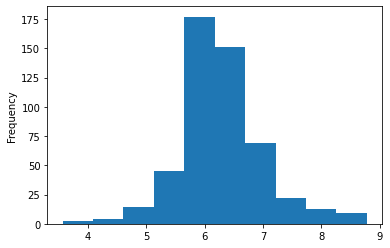

'The distribution of RM appears normal and symmetric.\n The symmetry aligns with what we observed from the output of describe(), \n as the mean of RM 6.28 is close to its median 6.21.'

In [16]:
#Visualization part1
boston['RM'].plot(kind='hist',
                  bins=10)
plt.show()
"""The distribution of RM appears normal and symmetric.
 The symmetry aligns with what we observed from the output of describe(), 
 as the mean of RM 6.28 is close to its median 6.21."""



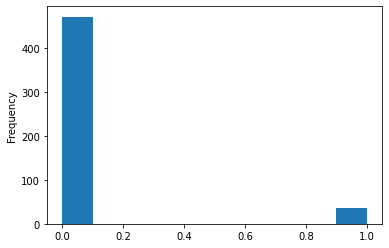

'CHAS only takes on two values, 0 and 1, with most of them 0’s. \nIt is consistent with what the describe() reports; \nspecifically, the third quartile of CHAS is 0.'

In [17]:
#Visualization part2 
boston['CHAS'].plot(kind='hist')
plt.show()
"""CHAS only takes on two values, 0 and 1, with most of them 0’s. 
It is consistent with what the describe() reports; 
specifically, the third quartile of CHAS is 0."""

In [18]:
#Correlation 
# ----->Correlation Matrix
"""To understand the relationship among features (columns), 
 a correlation matrix is very useful in the exploratory data analysis. 
 Correlation measures linear relationships between variables.
 We can construct a correlation matrix to show correlation coefficients between variables. 
 It is symmetric where each element is a correlation coefficient ranging from -1 and 1. A value near 1 (resp. -1) 
 indicates a strong positive (resp. negative) correlation between variables. We can create a correlation matrix using the "corr" function"""
corr_matrix = boston.corr().round(2)
#print this end of cell

"""The last row or column is used to identify features that are most correlated with the target MEDV (median value of owner-occupied homes in $1000’s). 
LSTAT (percentage of lower status of the population) is most negatively correlated with the target (-0.74) which means that as the percentage of lower status drops, 
the median house values increases; while RM (the average number of rooms per dwelling) 
is most positively correlated with MEDV (0.70) which means that the house value increases as the number of rooms increases"""
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


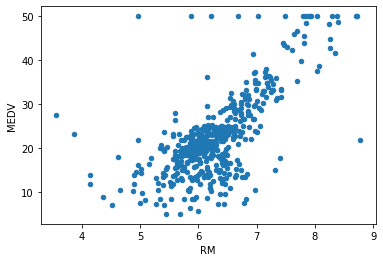

'We specify the type of the plot by passing a string ‘scatter’ to the argument kind, identify the labels for x and y respectively, and set the size of the figure via a tuple (width, height) in inches.\nThe price increases as the value of RM increases linearly. \nThere are a few outliers that appear to be outside of the overall pattern. \nFor example, one point on the center right corresponds to a house with almost 9 rooms but a median value slightly above $20K. \nHomes with similar values usually have around 6 rooms. In addition, the data seems to have a ceiling; that is the maximum median value is capped at 50.'

In [19]:
#Data Preparation - Feature Selection  part1
"""In the previous lesson, 
 we noticed that RM and MEDV are positively correlated.
 Recall that scatter plot is a useful tool to display the relationship between two features; 
 let’s take a look at the scatter plot:
 contentImageWe"""

#plotting : 
boston.plot(kind = 'scatter',
            x = "RM",
            y = "MEDV")
plt.show()

"""We specify the type of the plot by passing a string ‘scatter’ to the argument kind, identify the labels for x and y respectively, and set the size of the figure via a tuple (width, height) in inches.
The price increases as the value of RM increases linearly. 
There are a few outliers that appear to be outside of the overall pattern. 
For example, one point on the center right corresponds to a house with almost 9 rooms but a median value slightly above $20K. 
Homes with similar values usually have around 6 rooms. In addition, the data seems to have a ceiling; that is the maximum median value is capped at 50."""

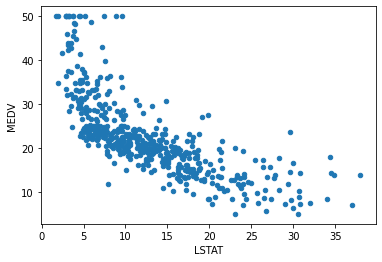

In [20]:
#Data Preparation - Feature Selection part2

"""On the other hand prices tend to decrease with an increase in LSTAT; and the trend isn’t as linear."""
boston.plot(kind = 'scatter',
            x = "LSTAT",
            y = "MEDV")
plt.show()

In [21]:
#choice X and Y
#Of the two features, RM appears a better choice for predicting MEDV. Thus we start with a univariate linear regression: MEDV = b + m * RM.
# Y --->  MEDV
# X --->  RM
"""In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array (Y).
Here we define the feature matrix as the column RM in boston and assign it to X. 
Note the double brackets around 'RM' in the code below, it is to ensure the result remains a DataFrame, a 2-dimensional data structure"""


x = boston[['RM']]
y = boston['MEDV']

In [22]:
#fit model part1
"""In scikit-learn, every class of model is represented by a class in python.
 A class of model is not the same as an instance of a model. Recall that instance is an individual object of a certain class. Thus,
  we first import the linear regression class, then instantiate the model, that is to create an instance of the class LinearRegression""" 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(model)

LinearRegression()


In [23]:
#fit model part2 (Train-Test Split)
"""Next we split the data into training and testing sets. Why?
  To assess the performance of the model on newly unseen data. 
  We train the model using a training set, and save the testing set for evaluation.
  A good rule of thumb is to split data 70-30, that is, 70% of data is used for training and 30% for testing. 
  We use train_test_split function inside scikit-learn’s module model_selection to split the data into two random subsets. Set random_state so that the results are reproducible."""

#import moudel
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train , Y_test = train_test_split(x, y, test_size = 0.7)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(151, 1)
(355, 1)
(151,)
(355,)


In [24]:
#fit model part3 (Fitting the Model)
"""In short, fitting is equal to training. It fits the model to the training data and finds the coefficients specified in the linear regression model, i.e., 
    intercept and slope. After it is trained, the model can be used to make predictions.
    Now let us apply the model to data. Remember, we save the testing data to report the model performance and only use the training set to build the model. The syntax is:"""

model.fit(X_train, Y_train)


LinearRegression()

In [25]:
#fit model part4 (Parameter Estimates)
"""The linear regression model has been fitted, what it means is that both parameters, the intercept and the slope,
    have been learned. What are they? In Scikit-learn, by convention all model parameters have trailing underscores, 
    for example to access the estimated intercept from the model, rounded to the 2nd decimal place for better display"""

b = model.intercept_.round(2)
m = model.coef_.round(2)

print(f"Y = {m} * X + {b}")

Y = [7.84] * X + -26.91


In [26]:
#fit model part5 (Prediction part1)
"""Once the model is trained, supervised machine learning will evaluate test data based on previous predictions for the unseen data.
     We can make a prediction using the predict() method."""
#see it
new_RM = np.array([6.5]).reshape(-1,1) # make sure it's 2d
result = model.predict(new_RM)
print(f"Estimated price for a house with 6 rooms is {result}")


Estimated price for a house with 6 rooms is [24.04880036]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
#fit model part5 (Prediction part2)
y_test_predict = model.predict(X_test)
print(y_test_predict.shape)

(355,)


<function matplotlib.pyplot.show(*args, **kw)>

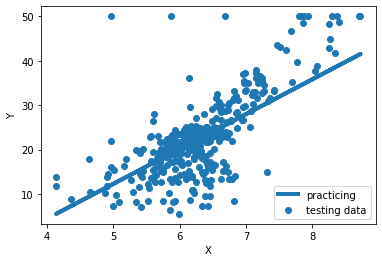

In [31]:
#fit model part5 (Prediction part3)
"""How good is our prediction? 
    We can examine model performance by visually comparing the fitted line and the true observations in the test set."""

plt.scatter(X_test, Y_test,
            label = "testing data")
plt.plot(X_test, y_test_predict,
         label ="practicing"  , linewidth = 4)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend ()
plt.show



In [42]:
#fit model part6 (Residuals part1)
"""Some points sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is referred to as residual or error.
 A residual is the difference between the observed value of the target and the predicted value.
  The closer the residual is to 0, the better job our model is doing."""
Residuals = Y_test - y_test_predict
print(Residuals[:5])
"""Those are individual data points, how about the model performance for all data points? We need a way to
 aggregate the residuals and just report one number as the metric. It is natural to take the average of all residuals"""

print("----------------------------------------------")

print(f"mean of Residuals :  {Residuals.mean()}")
"""-0.24 is quite close to 0, but there’s a problem: residuals can be positive or negative so taking the average cancels them out. 
That’s not an accurate metric. To solve this, we take a square of each residual, then take the mean of squares. This is called mean squared error (MSE)"""

print("----------------------------------------------")

print(f"mean squared error (MSE) :  {(Residuals**2).mean()}")


69     1.672978
222    0.479730
354    0.713522
472   -0.354862
349   -0.890687
Name: MEDV, dtype: float64
----------------------------------------------
mean of Residuals :  0.24592267866870776
----------------------------------------------
mean squared error (MSE) :  41.23664944996189


In [49]:
#fit model part6 (Residuals part2)
"""We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result:"""
from sklearn.metrics import mean_squared_error

print(f"mean squared error (MSE) :  {mean_squared_error(Y_test, y_test_predict)}")
"""In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based on the dependent variable, i.e., 
  MEDV in the test set. Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad."""




mean squared error (MSE) :  41.23664944996189


'In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based on the dependent variable, i.e., \n  MEDV in the test set. Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.'

In [53]:
#fit model part7 (R-squared)
"""Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score()"""
print(f"R-squared : {model.score(X_test, Y_test)}")
"""اIt is the proportion of total variation explained by the model. Here, around 60% of variability in the testing data is explained by our model."""


R-squared : 0.521093567444996


'اIt is the proportion of total variation explained by the model. Here, around 60% of variability in the testing data is explained by our model.'

In [63]:
#Multivariate Linear Regression part1
"""
Recall LSTAT (% lower status in population) is most negatively correlated to the home price. 
We can add the feature and build a multivariate linear regression model where the home price depends on both RM and LSTAT linearly"""


"""MEDV = b0 + b1 * RM + b2 * LSTAT
To find intercept b0, and coefficients b1 and b2, all steps are the same except for the data preparation part, we are now dealing with two features"""

x2 = boston[['RM', 'LSTAT']]
X2_train , X2_test, Y_train , Y_test = train_test_split(x2, y, test_size = 0.7)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)


print(f"b0 : {model2.intercept_.round(2)}")
print(f"b1 and b2  : {model2.coef_.round(2)}")

b0 : -5.04
b1 and b2  : [ 5.65 -0.55]


In [67]:
#Multivariate Linear Regression part2
y_test_predict2 = model2.predict(X2_test)
MSE2 = mean_squared_error(Y_test, y_test_predict2)
print(f"MSE : {MSE2}")

MSE : 30.681111590454726


In [ ]:
#this model id better